# Variance Threshold


In [ ]:
!pip install kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json /content/kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Check the file in its new directory
!ls /root/.kaggle/

# Check the file permission
!ls -l ~/.kaggle/kaggle.json

#Change the file permission
# chmod 600 file – owner can read and write
# chmod 700 file – owner can read, write and execute
!chmod 600 ~/.kaggle/kaggle.json

kaggle.json
-rw------- 1 root root 67 Mar 28 04:07 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d brynja/wineuci

  0% 0.00/4.20k [00:00<?, ?B/s]
100% 4.20k/4.20k [00:00<00:00, 3.25MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('loan_data.csv')
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [ ]:
df['credit.policy'].value_counts()
df['not.fully.paid'].value_counts()

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thresh=VarianceThreshold(0)

In [ ]:
X=df.drop(['not.fully.paid','purpose'],axis=1)
y=df['not.fully.paid']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2021)
X_train.shape

In [ ]:
var_thresh.fit(X_train)


In [ ]:
sum(var_thresh.get_support())

In [ ]:
len(X_train.columns[var_thresh.get_support()])

In [ ]:
X_train.columns[var_thresh.get_support()]

In [ ]:
constant_cols=[cols for cols in X_train.columns if 
               cols not in X_train.columns[var_thresh.get_support()]]

In [ ]:
print(constant_cols)

In [ ]:
if len(constant_cols)>1:
  X_train.drop(constant_cols,axis=1,inplace=True)
  X_test.drop(constant_cols,axis=1,inplace=True)
else:   
  print('No Columns are to be deleted') 
  

# Feature Selection using Correlation

In [ ]:
from sklearn.datasets import load_boston
data=load_boston()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X=df.drop(['target'],axis=1)
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2021)
X_train.shape

(404, 13)

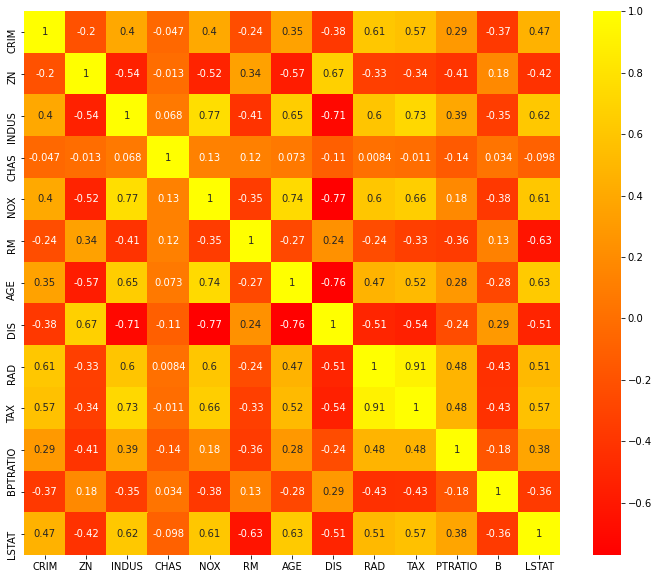

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True, cmap=plt.cm.autumn)
plt.show()

In [ ]:
def correlation(dataset,threshold):
  col_corr= set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) >threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)



In [ ]:
corr_features=correlation(X_train,0.7)
corr_features

['DIS', 'AGE', 'TAX', 'NOX']

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_train.shape

(404, 9)

# Mutual Information

In [ ]:
!unzip wineuci.zip

Archive:  wineuci.zip
replace Wine.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
features=['Wine','Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash',
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 ',
'Proline']

In [ ]:
wine_df=pd.read_csv('Wine.csv',names=features)
wine_df.head(10)

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [ ]:
wine_df['Wine'].unique()

array([1, 2, 3])

In [ ]:
wine_df.describe()

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
wine_df.isnull().sum()

Wine                    0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
                                          wine_df.drop('Wine',axis=1),
                                          wine_df['Wine'],
                                          test_size=0.2,
                                          random_state=21)
X_train.shape

(142, 13)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.5248566 , 0.27583386, 0.11711657, 0.20153937, 0.1321313 ,
       0.36778804, 0.67253299, 0.14040796, 0.27212752, 0.52736372,
       0.45236208, 0.48839887, 0.54885525])

In [ ]:
X_train.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 ', 'Proline'],
      dtype='object')

In [ ]:
# df3=pd.DataFrame({'columns':X_train.columns,'values':mutual_info}).sort_values('values',ascending=False).reset_index(drop=True)
# df3
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.672533
Proline                 0.548855
Color intensity         0.527364
Alcohol                 0.524857
OD280/OD315             0.488399
Hue                     0.452362
Total phenols           0.367788
Malic acid              0.275834
Proanthocyanins         0.272128
Alcalinity of ash       0.201539
Nonflavanoid phenols    0.140408
Magnesium               0.132131
Ash                     0.117117
dtype: float64

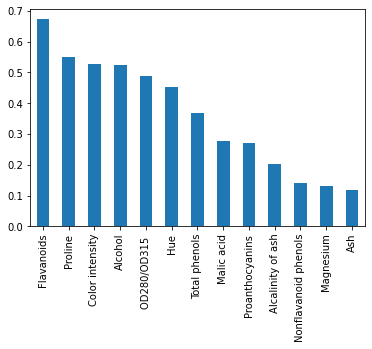

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar()

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
sel_five_cols=SelectKBest(mutual_info_classif,k=5)
sel_five_cols.fit(X_train,y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Alcohol', 'Flavanoids', 'Color intensity', 'OD280/OD315 ', 'Proline'], dtype='object')

# Mutual Info Regressor 

In [ ]:
train=pd.read_csv('/content/house_price_train.csv')
test=pd.read_csv('/content/house_price_test.csv')

In [ ]:
numeric_list=['int16','int32','int64','float64','float32','float64']
numeric_cols=list(train.select_dtypes(include=numeric_list).columns)

In [ ]:
df=train[numeric_cols]
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df=df.drop('Id',axis=1)

In [ ]:
# df.dropna(how='any',inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
                                          df.drop('SalePrice',axis=1),
                                          df['SalePrice'],
                                          test_size=0.2,
                                          random_state=21)
X_train.shape

(1168, 36)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_info= mutual_info_regression(X_train.fillna(0),y_train)
mutual_info

array([0.28281677, 0.1850811 , 0.16153887, 0.5253642 , 0.09707437,
       0.36036019, 0.24523441, 0.07746714, 0.17538063, 0.        ,
       0.13574731, 0.36025527, 0.29893803, 0.20893186, 0.01274952,
       0.46703093, 0.0361843 , 0.01387573, 0.25740953, 0.08676522,
       0.04435218, 0.03903624, 0.21056941, 0.16170068, 0.25157942,
       0.3780711 , 0.37179463, 0.08329623, 0.14898811, 0.037605  ,
       0.        , 0.00789549, 0.        , 0.00400269, 0.        ,
       0.0184233 ])

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index= X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.525364
GrLivArea        0.467031
GarageCars       0.378071
GarageArea       0.371795
YearBuilt        0.360360
TotalBsmtSF      0.360255
1stFlrSF         0.298938
MSSubClass       0.282817
FullBath         0.257410
GarageYrBlt      0.251579
YearRemodAdd     0.245234
TotRmsAbvGrd     0.210569
2ndFlrSF         0.208932
LotFrontage      0.185081
BsmtFinSF1       0.175381
Fireplaces       0.161701
LotArea          0.161539
OpenPorchSF      0.148988
BsmtUnfSF        0.135747
OverallCond      0.097074
HalfBath         0.086765
WoodDeckSF       0.083296
MasVnrArea       0.077467
BedroomAbvGr     0.044352
KitchenAbvGr     0.039036
EnclosedPorch    0.037605
BsmtFullBath     0.036184
YrSold           0.018423
BsmtHalfBath     0.013876
LowQualFinSF     0.012750
ScreenPorch      0.007895
MiscVal          0.004003
BsmtFinSF2       0.000000
MoSold           0.000000
3SsnPorch        0.000000
PoolArea         0.000000
dtype: float64

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
selected_top_columns=SelectPercentile(mutual_info_regression,
                                      percentile=20)
selected_top_columns.fit(X_train.fillna(0),y_train)
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

# Chi2 Test (Categorical Variable)

In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
cols=['sex','embarked','alone','pclass','survived']
df=df[cols]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       891 non-null    object
 1   embarked  889 non-null    object
 2   alone     891 non-null    bool  
 3   pclass    891 non-null    int64 
 4   survived  891 non-null    int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 28.8+ KB


In [ ]:
df['sex']=np.where(df['sex']=='male',1,0)
ordinal_label={k:i for i,k in enumerate(df['embarked'].unique())}
df['embarked']=df['embarked'].map(ordinal_label)
df['alone']=np.where(df['alone']==True,1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
                                          df.drop('survived',axis=1),
                                          df['survived'],
                                          test_size=0.2,
                                          random_state=21)
X_train.shape

(712, 4)

In [ ]:
# Perform Chi2 Test
from sklearn.feature_selection import chi2
fscore,pvalue=chi2(X_train,y_train)

In [ ]:
fscore

array([72.61784914, 11.81393873, 11.14651193, 22.36421138])

In [ ]:
pvalue

array([1.57349500e-17, 5.87889326e-04, 8.41898269e-04, 2.25537895e-06])

In [ ]:
pvalues=pd.Series(pvalue)
pvalues.index=X_train.columns
pvalues.sort_index(ascending=False)

sex         1.573495e-17
pclass      2.255379e-06
embarked    5.878893e-04
alone       8.418983e-04
dtype: float64

In [ ]:
## Observation

Sex column in the most column when compared to the output

# Last

In [ ]:
df=pd.read_csv('/content/mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
X=df.iloc[:,:-1]
y=df['price_range']

#### most important feature selection technique
1.univariate selection
2.forward test
3.backward test


### univariate selection

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [ ]:
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [ ]:
df3=pd.DataFrame({'Score':ordered_feature.scores_,'columns':X.columns}).sort_values('Score',ascending=False).reset_index(drop=True)
df3

,Score,columns
0,931267.519053,ram
1,17363.569536,px_height
2,14129.866576,battery_power
3,9810.586750,px_width
4,95.972863,mobile_wt
5,89.839124,int_memory
6,16.480319,sc_w
7,13.236400,talk_time
8,10.135166,fc
9,9.614878,sc_h


In [ ]:
df3.nlargest(10,'Score')

,Score,columns
0,931267.519053,ram
1,17363.569536,px_height
2,14129.866576,battery_power
3,9810.586750,px_width
4,95.972863,mobile_wt
5,89.839124,int_memory
6,16.480319,sc_w
7,13.236400,talk_time
8,10.135166,fc
9,9.614878,sc_h


### Feature Importance

###### Higher value mean higher importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.06011319 0.01920596 0.03283845 0.02068955 0.03250661 0.01641949
 0.03464605 0.03319228 0.0361291  0.03315452 0.03334242 0.04755654
 0.04774025 0.39876231 0.03312286 0.03369237 0.03457608 0.01367264
 0.01897785 0.01966147]


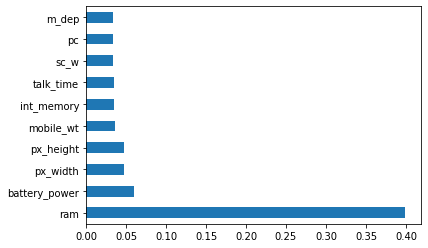

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
ranked_features.nlargest(10).plot.barh()

### Correlation

##### Pearson Correlation

In [ ]:
import seaborn as sns

In [ ]:
corr=df.iloc[:,:-1].corr()
top_features=corr.index

In [ ]:
top_features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

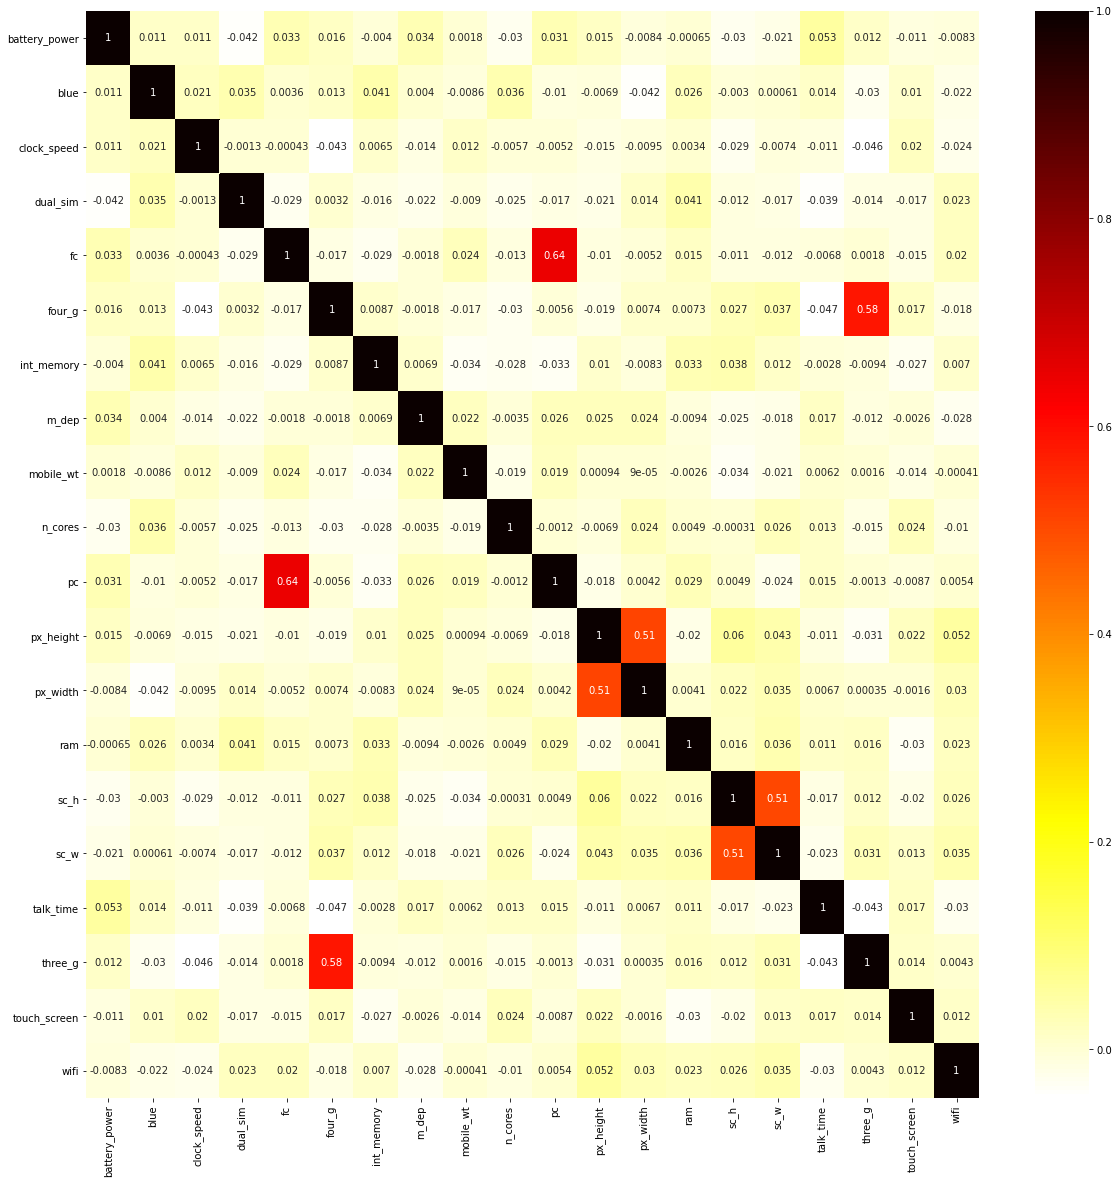

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True,cmap=plt.cm.hot_r)
plt.show()

In [ ]:
threshold=0.5

In [ ]:
def correlation(dataset,threshold):
  col_corr= set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) >threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)



In [ ]:
cols=correlation(df.iloc[:,:-1],0.5)
cols

['pc', 'sc_w', 'px_width', 'three_g']

### Mutual Info Clasifier
